Total de imóveis: 11

Primeiros registros:
                       titulo                   localizacao  \
0  Sala/Conjunto para comprar  Jardim Paulistano, São Paulo   
1    Apartamento para comprar          Pinheiros, São Paulo   
2    Apartamento para comprar          Pinheiros, São Paulo   

                        endereco                     preco  \
0  Avenida Brigadeiro Faria Lima  A partir de R$ 3.000.000   
1      Avenida Pedroso de Morais              R$ 1.636.400   
2                 Rua João Moura  A partir de R$ 2.750.000   

                               condominio_iptu    area  quartos  banheiros  \
0  Cond. a partir de R$ 5.550 • IPTU R$ 57.601  179 m²        2          5   
1                                Não informado   71 m²        2          2   
2     Cond. a partir de R$ 1.500 • IPTU R$ 770  103 m²        2          2   

           vagas        destaque  \
0  Não informado  Super Destaque   
1              1   Em construção   
2              2  Super Destaque  

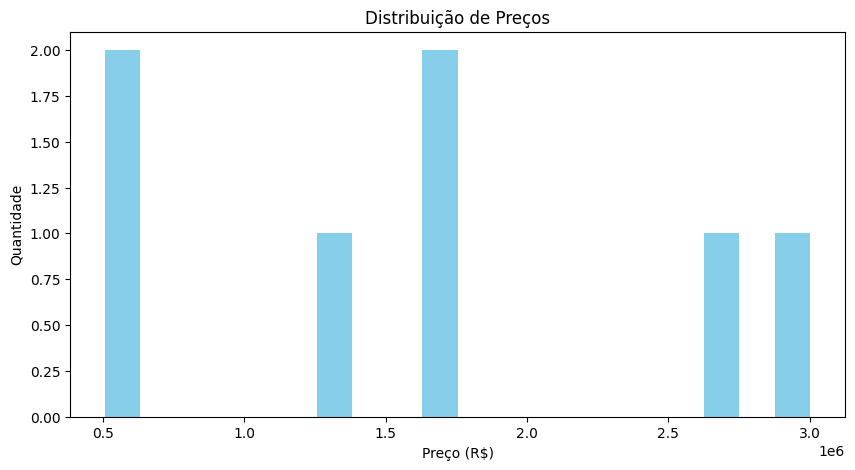

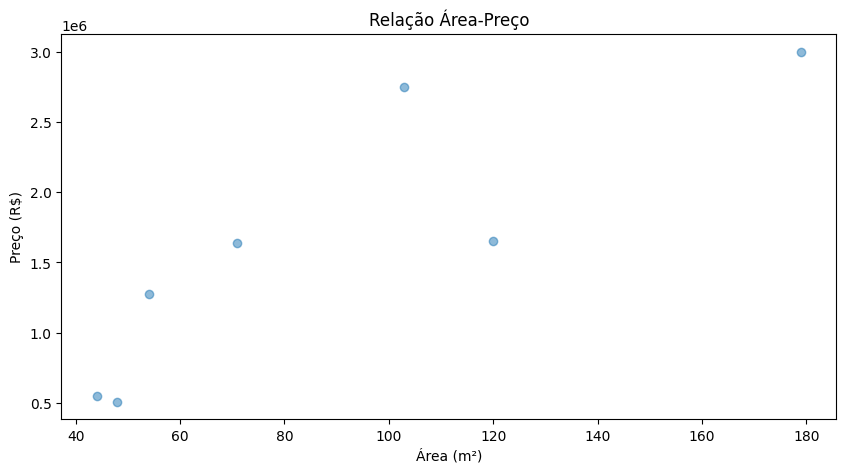


Top 5 imóveis mais caros:
                    titulo                  localizacao  preco_num
Sala/Conjunto para comprar Jardim Paulistano, São Paulo  3000000.0
  Apartamento para comprar         Pinheiros, São Paulo  2750000.0
  Apartamento para comprar         Pinheiros, São Paulo  1650000.0
  Apartamento para comprar         Pinheiros, São Paulo  1636400.0
  Apartamento para comprar         Pinheiros, São Paulo  1275000.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("imoveis_sp_sao-paulo_zona-oeste_pinheiros.csv", encoding='utf-8-sig')

print(f"Total de imóveis: {len(df)}")
print("\nPrimeiros registros:")
print(df.head(3))

df_high = df[df['preco_num'] > 500000]
print(f"\nImóveis acima de R$500k: {len(df_high)}")

print("\nEstatísticas básicas:")
print(df_high[['preco_num', 'area_num', 'quartos']].describe())

print("\nPreço médio por bairro:")
print(df_high.groupby('localizacao')['preco_num'].mean().sort_values(ascending=False).round(2))

plt.figure(figsize=(10,5))
plt.hist(df_high['preco_num'], bins=20, color='skyblue')
plt.title('Distribuição de Preços')
plt.xlabel('Preço (R$)')
plt.ylabel('Quantidade')
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(df_high['area_num'], df_high['preco_num'], alpha=0.5)
plt.title('Relação Área-Preço')
plt.xlabel('Área (m²)')
plt.ylabel('Preço (R$)')
plt.show()

print("\nTop 5 imóveis mais caros:")
top5 = df_high.nlargest(5, 'preco_num')[['titulo', 'localizacao', 'preco_num']]
print(top5.to_string(index=False))